*IMPORTANT: In this compendium, we will assume that you have knowledge of basic python programming and physics.*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# SciPy
This package contains various toolboxes dedicated to common issues in scientific computing. It is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

## Index
* [Installing](#ins)
* [Import](#import)
* [Constants](#const) 
* [File input/output: scipy.io](#inout)
* [Special functions: scipy.special](#special)
* [Linear algebra operations: scipy.linalg](#linalg)
* [Interpolation: scipy.interpolate](#inter)
* [Optimization and fit: scipy.optimize](#opti)
* [Statistics: scipy.stats](#stats)
* [Calculus](#int)
* [Fast Fourier transforms: scipy.fftpack](#four)
* [Signal processing: scipy.signal](#signal)
* [Image manipulation: scipy.ndimage](#img)

## Installing <a class="anchor" id="ins"></a>
If you already have Python, you can install it with: **conda install scipy** or **pip install scipy**.

## Import <a class="anchor" id="import"></a>
You have to import SciPy in your Python code, to access SciPy and its functions.

In [2]:
import scipy as sp

## Constants <a class="anchor" id="const"></a>
SciPy contains many physical and mathematical constants and units. Such as: https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants
- $\pi$

In [14]:
sp.pi

3.141592653589793

## File input/output: scipy.io <a class="anchor" id="inout"></a>

In [15]:
from scipy import io as spio

- Loading and saving Matlab files

In [16]:
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat') # Loading matlab file
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Special Functions <a class="anchor" id="special"></a>
Special functions are transcendental functions. https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

* The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

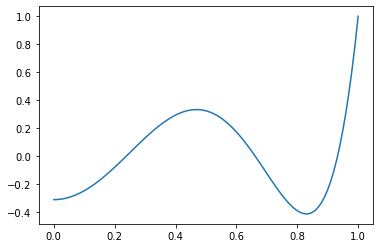

In [17]:
from scipy.special import legendre
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

* Laplace's Equation in Polar Coordinates

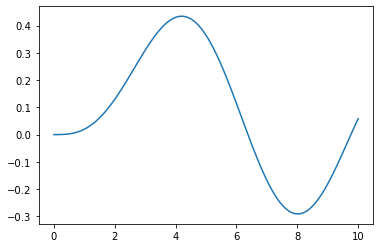

In [18]:
from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

# Linear algebra operations: scipy.linalg  <a class="anchor" id="linalg"></a>
- The scipy.linalg.det() function computes the determinant of a square matrix

In [19]:
from scipy import linalg

In [20]:
arr = np.array([[1, 2], [3, 4]])
linalg.det(arr)

-2.0

- The scipy.linalg.inv() function computes the inverse of a square matrix

In [21]:
arr = np.array([[1, 2], [3, 4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [22]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

## Basics
**Triangular matrices**: there's zero values above the main diagonal

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [23]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

**Toeplitz Matrices** (matrices with constant diagonals)
$$ \begin{bmatrix} 1 & -1 & 2 & 3\\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix} \vec{x} = \begin{bmatrix} 1\\2\\2\\5 \end{bmatrix} $$

In [24]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

## Eigenvalue Problems
Eigenvalue problems can be solved using numpy, so here we focus on particular cases for optimization

In [25]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} \vec{x} = \lambda x $$

In [26]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)

In [27]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [28]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [29]:
w[0] * v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

## Special Matrices
Fiedler matrix $A_{ij} = |a_i - a_j|$ where $a_i$ is some sequence of numbers

In [30]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices (matrices with constant diagonals)

In [31]:
from scipy.linalg import toeplitz
toeplitz([1,2,3,6,0,0], [1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices
## Decompositions
LU decomposition $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is an upper triangular matrix.

In [32]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)
# p = permutation matrix
# l = lower triangular
# u = upper triangular

Choleski decomposition: find matrix $C$ such that $A = CC^T$

In [33]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [34]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [35]:
C@C.T #Verification, it returns A

array([[1. , 0.2],
       [0.2, 1. ]])

In [36]:
A

array([[1. , 0.2],
       [0.2, 1. ]])

## Interpolation: scipy.interpolate <a class="anchor" id="inter"></a>
It is useful for fitting a function from experimental data and thus evaluating points where
no measure exists.

- Suppose you have the following data (I generate it here, but perhaps you collect $x$ and $y$ by means of some experiment)

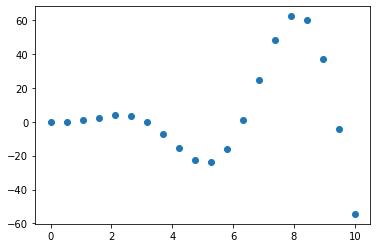

In [37]:
x = np.linspace(0, 10, 20) #It give us 20 points between 0 and 10
y = x**2 * np.sin(x)
plt.scatter(x,y) #Plot

You want to know the values in between.

In [38]:
from scipy.interpolate import interp1d

In [39]:
#You can build a linear interpolation function:
f = interp1d(x, y, kind='cubic') #The kind could be line but it is better with cubic
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

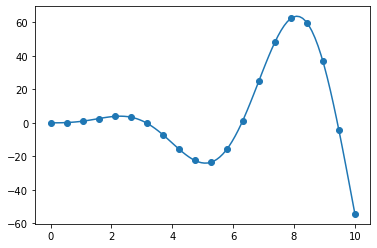

In [40]:
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

scipy.interpolate.interp2d is similar to scipy.interpolate.interp1d, but for 2-D arrays.

## Optimization and fit: scipy.optimize <a class="anchor" id="opti"></a>
This package provides several commonly used optimization algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding, you can find the list of commands here: https://scipy.github.io/devdocs/reference/optimize.html#module-scipy.optimize.

In [41]:
from scipy import optimize
from scipy.optimize import minimize

#### Finding the minimum of a scalar function
Let's minimize $f(x) = (x-1)^2$

In [42]:
#We define the function
def f(x):
    return (x-1)**2

#We minimize the fuction for 
res = minimize(f, x0=2) #X0 is the initial guess
res 

      fun: 5.5507930236677874e-17
 hess_inv: array([[0.5]])
      jac: array([4.32431868e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999999])

As you see, it conteins a lot of information, for example if you only want to know the minimum value of the function,

In [43]:
res.fun

5.5507930236677874e-17

If you only want the minimum value x can take,

In [44]:
res.x #it returns an array

array([0.99999999])

In [45]:
res.x[0] #it returns the x as a numberfrom scipy import optimize

0.9999999925496356

Now we are going to minimize a 2D function with constrictions

$f(x, y) = (x-1)^2 + (y-2)^2$ with,

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$



* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [46]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2)**2 #This is the function
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2}, #Constriction 1
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6}, #Constriction 2
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2}) #Constriction 3
bnds = ((0, None), (0, None)) #Bounds sepecified as rectangular
                              #None means that it is unbounded
res = minimize(f, (2, 0), bounds=bnds, constraints=cons) #We minimize the function

In [47]:
res.x #It returns the values of x and y

array([1.2, 1.6])

You will have to use of different techniques for different problems.

In [48]:
minimize? 

SyntaxError: invalid syntax (<ipython-input-48-2f4b6889af0f>, line 1)

## Curve Fitting

Suppose we have the following data

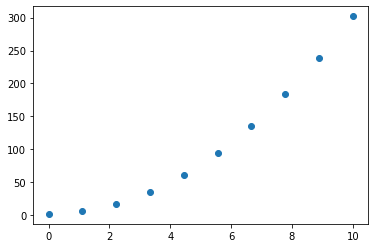

In [52]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

 First we have to define the test function to fit. Here we want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

In [53]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
pars, pcov = curve_fit(func, x_data, y_data, p0=(1,1)) #pars: parameters, pcov: covariance, p0: initial guess
pars # It returns a, b

array([3., 2.])

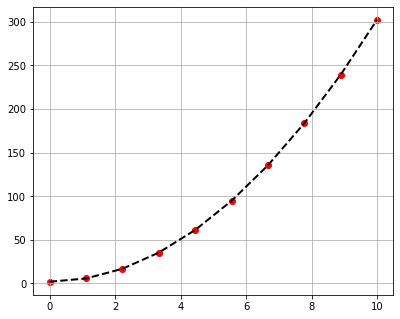

In [54]:
fig_ajuste = plt.figure(figsize=(5,4))
axes_ajuste = fig_ajuste.add_axes([0,0,1,1])

axes_ajuste.plot(x_data, func(x_data, *pars), linestyle='--', linewidth=2, color='black')
axes_ajuste.scatter(x_data, y_data, color='r')

#Grid 
axes_ajuste.grid(True)

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [55]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

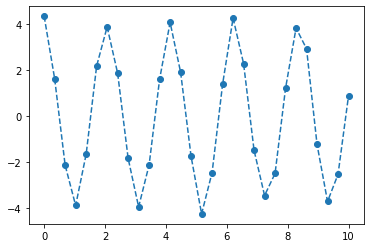

In [56]:
plt.plot(t_data,y_data,'o--')

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds. Thus good initial guess is

* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [57]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.99899521, 0.10411352])

In [58]:
A, w, phi = popt

In [59]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

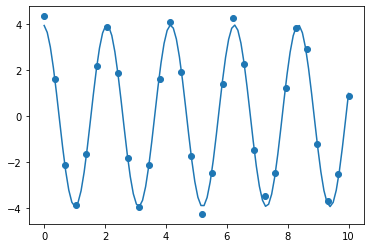

In [60]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

The parameters

In [ ]:
popt

The estimated error on the parameters are given by de diagonal of the cov

In [ ]:
np.sqrt(np.diag(pcov))

#### Global minimum
A possible issue with this approach is that, if the function has local minima, the algorithm
may find these local minima instead of the global minimum depending on the initial point x0:

In [70]:
#We define the function
def func(x):
    return 3.94836219*np.cos(2.99899521*x + 0.10411352)
#The minimun near x0=0
res = optimize.minimize(func, x0=0, method="L-BFGS-B") 
res.x[0]

1.0128322674935073

#### Finding the roots of a scalar function
We can use **scipy.optimize.root()** to find a root of the function, i.e. a point where $f(x) = 0$.

In [75]:
root = optimize.root(func, x0=6) # our initial guess is 6
root

    fjac: array([[-1.]])
     fun: array([4.35425817e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.46474597e-08])
       r: array([-11.84111922])
  status: 1
 success: True
       x: array([5.7268001])

In [76]:
root.x

array([5.7268001])

# Statistics: scipy.stats <a class="anchor" id="stats"></a>

**Example 1**: $\beta$ distribution

$$ f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1$$

In [88]:
from scipy.stats import beta

Basic Statistics

In [89]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

Probability Distribution Plotting:

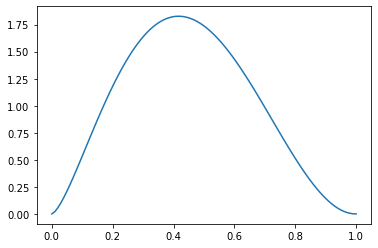

In [90]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x, beta.pdf(x, a, b))

Generating Random Variables:

In [91]:
r = beta.rvs(a, b, size=10)
r

array([0.58503933, 0.35322046, 0.66197017, 0.241113  , 0.38259496,
       0.5835585 , 0.41921269, 0.52866305, 0.52619238, 0.57371971])

**Example 2**: Gaussian Distribution

$$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{exp}\left(-\frac{(x-\mu)^2}{\sigma^2} \right) \hspace{20mm} -\infty < x \leq \infty $$

In [92]:
from scipy.stats import norm

In [93]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')

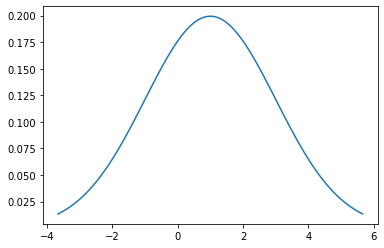

In [94]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

**Example 3**: Multinomial Distribution

$$ f(x_1, x_2, ..., x_k; p_1, p_2, ... p_k, n) = \frac{n!}{x_1! ... x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$
Rolling a die

In [86]:
from scipy.stats import multinomial

p = np.ones(6)/6
multinomial.pmf([6,0,0,0,0,0], n=6, p=p) #This give me the probability of get one 6 and 5 zeros

2.143347050754453e-05

In [87]:
multinomial.rvs(n=100, p=p, size=5)

array([[21, 14, 13, 18, 18, 16],
       [27, 14, 15, 17, 13, 14],
       [11, 20, 18, 17, 20, 14],
       [15, 18, 18, 21, 12, 16],
       [19, 18, 20, 10, 16, 17]])

# Calculus:  <a class="anchor" id="int"></a>

## Differentiation

In [3]:
from scipy.misc import derivative

- For example: 
$$\frac{d}{dx}x^2 \sin(2x) e^{-x} $$

In [4]:
#We define the function 
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

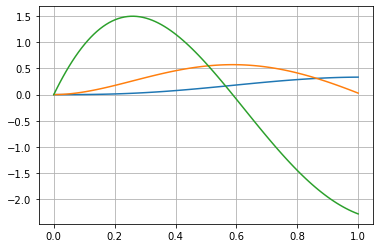

In [15]:
plt.plot(x, f(x)) #Plot the function
plt.plot(x, derivative(f, x, dx=1e-6)) #first derivative
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) #seconf derivative
plt.grid()

## Integration: scipy.integrate
#### Single integrals
$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [16]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [21]:
integral

0.590090324408853

#### Double integrals

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [18]:
from scipy.integrate import dblquad
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [19]:
integral

0.590090324408853

## Differetial Equations

Scipy.integrate also features routines for integrating Ordinary Differential Equations (ODE).

**First Order ODEs**

- Example: Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [22]:
from scipy.integrate import odeint

All information about differential equation
$$\Rightarrow \frac{dv}{dt}=\alpha v^2-\beta$$

In [23]:
def dvdt(v, t):
    return 3*v**2 - 5 #α=3, β=5
v0 = 0 #initial condition

Solve differential equation

In [24]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [25]:
v_sol = sol.T[0]

Plot the solution

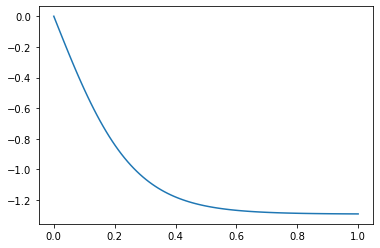

In [26]:
plt.plot(t, v_sol)

**Coupled first order ODEs**

- Example: $$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $\frac{dS}{dx} = (\frac{dy_1}{dx}, \frac{dy_2}{dx})$. The function $\frac{dS}{dx}$ can take in $S=(y_1, y_2)$ and $x$

In [27]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
#initial conditions
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [28]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [29]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

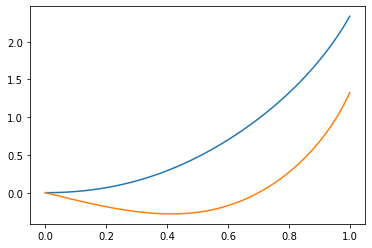

In [30]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

**Second Order ODEs**

- Example: Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$

Scipy can only solve coupled first order ODEs, but **any second order ODE can be turned into two coupled first order ODEs**. The same thing goes for higher order ODEs. 

Define $\omega = \frac{d\theta}{dt}$ so that one has the following coupled ODEs

$$\frac{d \omega}{  dt} = \sin(\theta)$$
$$\frac{d \theta }{ dt} = \omega \quad\quad$$

Let $S = (\theta, \omega)$

In [31]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
           np.sin(theta)]
#initial conditions
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [32]:
t = np.linspace(0, 20, 100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T

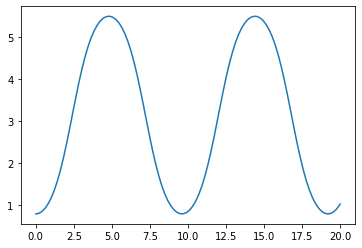

In [33]:
plt.plot(t, theta)
plt.show()

## Fourier Transforms <a class="anchor" id="four"></a>

The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$

* $k/N$ represents a specific frequency (dimensionless)
* can be converted to a frequency (Hz) if you know the spacing in $x$

The scipy.fftpack module computes fast Fourier transforms (FFTs) and offers utilities to handle them. The
main functions are:

- **scipy.fftpack.fft()**: to compute the FFT
- **scipy.fftpack.fftfreq()**: to generate the sampling frequencies
- **scipy.fftpack.ifft()**: computes the inverse FFT, from frequency space to signal space

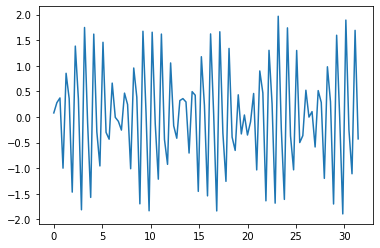

In [34]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(x, y)

We are going to get the fourier transform of this time series

In [35]:
from scipy.fft import fft, fftfreq
N = len(y) #This is the length of the time series
yf = fft(y)[:N//2] #This ([:N//2]) give only the positive values of the fourier transform
xf = fftfreq(N, np.diff(x)[0])[:N//2] #This give me the frequencies

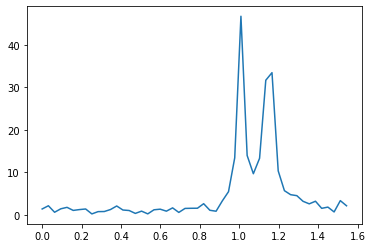

In [36]:
plt.plot(xf, np.abs(yf))
plt.show()

# Signal processing: scipy.signal <a class="anchor" id="signal"></a>
- **scipy.signal.resample(x, num, t=None)**: resample a signal to n points using FFT.
Here, 
- x: The data to be resampled.
- num: The number of samples in the resampled signal.
- t: If t is given, it is assumed to be the equally spaced sample positions associated with the signal data in x.

In [71]:
from scipy import signal

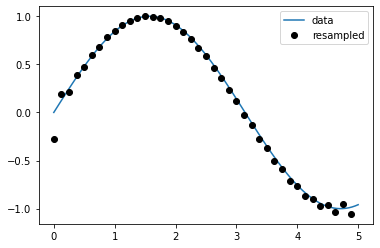

In [75]:
y = np.linspace(0, 5, 10, endpoint=False)
x = np.sin(t)

x_resampled = signal.resample(x, 40)
y_new = np.linspace(0, 5, 40, endpoint=False)
plt.plot(t, x)
plt.plot(y_new, x_resampled, 'ko')
plt.legend(['data', 'resampled'], loc='best')

- **scipy.signal.detrend()**: remove linear trend from signal.

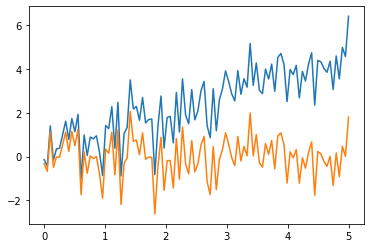

In [79]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

x_detrended = signal.detrend(x)

plt.plot(t, x)
plt.plot(t, x_detrended)

# Image manipulation: scipy.ndimage <a class="anchor" id="img"></a>
**scipy.ndimage** provides manipulation of n-dimensional arrays as images

In [5]:
from scipy import ndimage

In [16]:
from PIL import Image
img = Image.open("space.jpg") 

### Geometrical transformations on images

In [23]:
from scipy import misc # Load an image
face = misc.face(gray=True)
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

(1536, 2048)

(-0.5, 2047.5, 1535.5, -0.5)

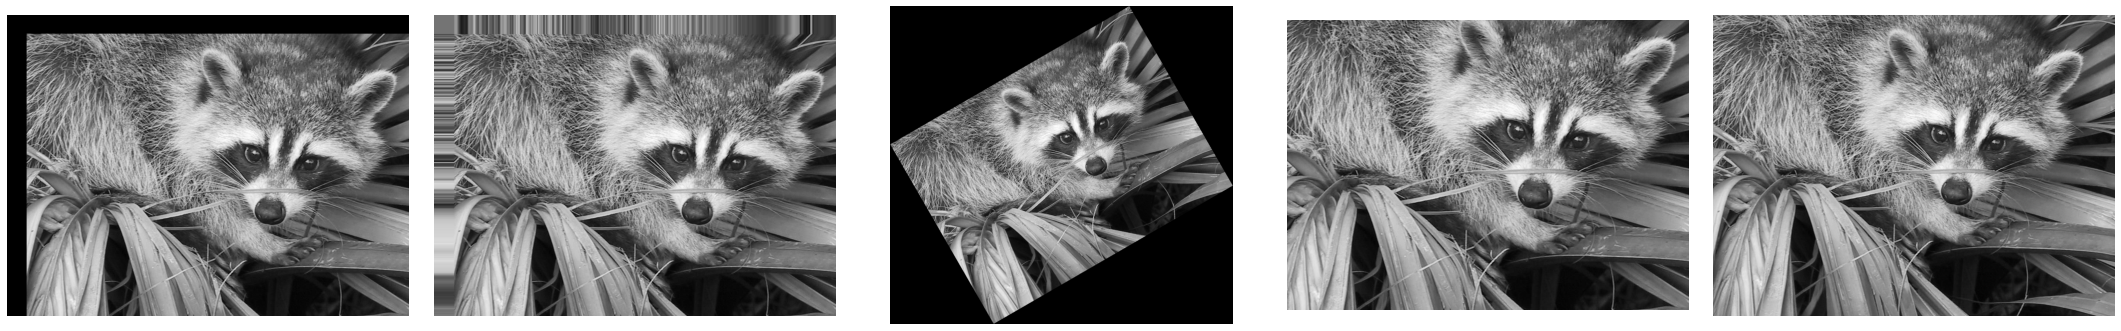

In [28]:
fig_im, axes_im = plt.subplots(figsize=(30,5), nrows=2, ncols=3)
plt.tight_layout()
axes_im[0,0]

plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

### Image filtering

In [27]:
face = face[:512, -512:] # crop out square on right
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
#Apply a variety of filters on it:
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5))

(-0.5, 511.5, 511.5, -0.5)

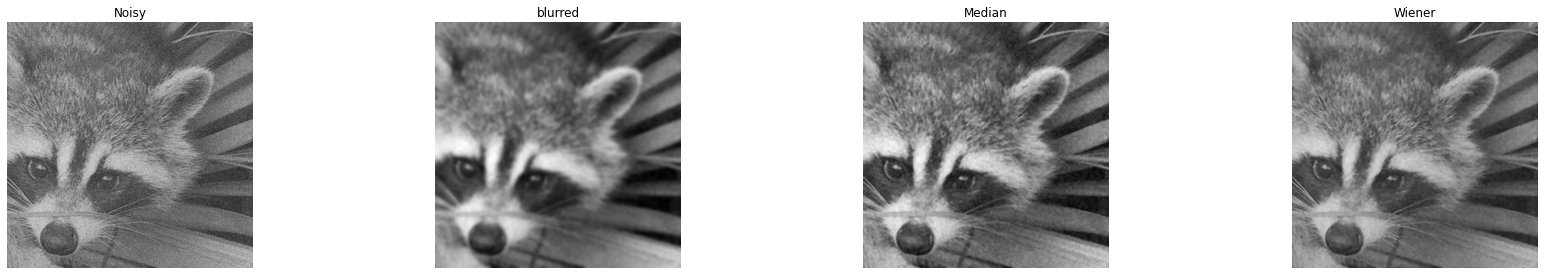

In [34]:
fig_imfilt, axes_im = plt.subplots(figsize=(30,4), nrows=1, ncols=4)
plt.tight_layout()

plt.subplot(151)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.title("Noisy")
plt.axis('off')
plt.subplot(152)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.title("blurred")
plt.axis('off')
plt.subplot(153)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.title("Median")
plt.axis('off')
plt.subplot(154)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title("Wiener")
plt.axis('off')